<a href="https://colab.research.google.com/github/alexandertaoadams/AlexanderAdamsMastersThesis/blob/main/Timing_Test_For_Compiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpjax

In [ ]:
import jax
import gpjax
import jax.numpy as jnp
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/alexandertaoadams/AlexanderAdamsMastersThesis.git

import sys
sys.path.insert(0, '/content/AlexanderAdamsMastersThesis')
import AlexanderAdamsMastersThesis.src as src

from src.algorithms import Gram_XX, Gram_XX_jit

## **Timing Test**

In [ ]:
# Approximation of 1 second long Brownian Motion
def brownian_motion(number, dimensions, length):
    shape = (number, dimensions, length)
    key = jax.random.PRNGKey(0)
    gaussian_matrix = jax.random.normal(key, shape) / jnp.sqrt(length)
    brownian_matrix = jnp.cumsum(gaussian_matrix, axis=2)
    return jnp.array(brownian_matrix)

In [ ]:
n_levels = 4
n_X = np.round(np.logspace(1, 3, 100)).astype(int)
n_dimensions=10
n_timesteps=10

In [ ]:
eager = []
compiled = []

for n in n_X:
    bm = brownian_motion(n, n_dimensions, n_timesteps)
    # Eager
    t0 = time.perf_counter()
    _ = Gram_XX(bm, n, n_timesteps, n_levels-1, jnp.ones(n_dimensions), 1.0, jnp.ones(n_levels))
    t1 = time.perf_counter()
    eager.append(t1-t0)

    # Compile
    _ = Gram_XX_jit(bm, n, n_timesteps, n_levels-1, jnp.ones(n_dimensions), 1.0, jnp.ones(n_levels))

    # Run
    s0 = time.perf_counter()
    _ = Gram_XX_jit(bm, n, n_timesteps, n_levels-1, jnp.ones(n_dimensions), 1.0, jnp.ones(n_levels))
    s1 = time.perf_counter()
    compiled.append(s1-s0)

In [ ]:
speedup = [eager[i] / compiled[i] for i in range(len(eager))]

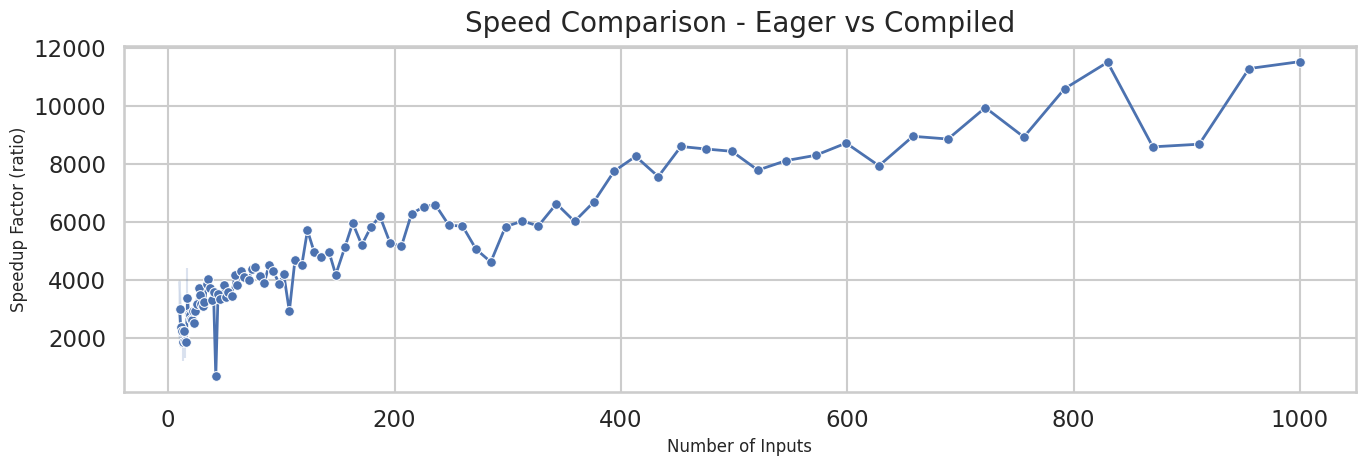

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(14, 5))
sns.lineplot(
    x=n_X,
    y=speedup,
    marker="o",
    linewidth=2,
    markersize=7
)

plt.title("Speed Comparison - Eager vs Compiled", pad=10, fontsize=20)
plt.xlabel("Number of Inputs", fontsize=12)
plt.ylabel(r"Speedup Factor (ratio)", fontsize=12)

plt.tight_layout()
plt.show()